In [ ]:
!pip install tensorflow==2.14.0
!pip install numpy==1.26.4
!pip install scikit-learn==1.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: google-auth-oauthlib
    Found existing ins

In [ ]:
import kagglehub
desired_path="/kaggle/input"
sathiralamal_sinhala_letter_454_path = kagglehub.dataset_download('sathiralamal/sinhala-letter-454')
print(sathiralamal_sinhala_letter_454_path)

print('Data source import complete.')


/root/.cache/kagglehub/datasets/sathiralamal/sinhala-letter-454/versions/1
Data source import complete.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# Importing all necessary packages

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow import keras
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Loading data using file path

### Dataset Structure:
Ensure the dataset is organized into separate folders for train, test, and validation sets.
### Loading Data:
Load the data using the respective folder paths.
### Image Size Recommendation:
Recommended image size: 80x80 pixels.

In [ ]:
train_path = sathiralamal_sinhala_letter_454_path + '/Dataset454/train'
valid_path = sathiralamal_sinhala_letter_454_path + '/Dataset454/valid'
test_path  = sathiralamal_sinhala_letter_454_path + '/Dataset454/test'

In [ ]:
def draw_plot(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')
    plt.show()

In [ ]:
img_height=80
img_weight=80

# Data lables and index in unicode format

### Class and Unicode Mapping:
This class includes a Unicode map of 454 Sinhala text representations in the index.
### Unicode Display:
Some text may display in Unicode without support. Use Singlish values as labels.
### Conversion to Unicode:
When using this index, consider converting Singlish values to Unicode with a separate layer.
### Array Index and Class Label:
Note that the array index and class label number are the same.

In [ ]:
sinhala_classes=["අ","ආ","ඇ","ඈ","ඉ","ඊ","උ","එ","ඒ","ඔ","ඕ",
             "ක","කා","කැ","කෑ","කි","කී","කු","කූ","ක්","කෝ","ක්‍ර","ක්‍රි","ක්‍රී",
             "ග","ගා","ගැ","ගෑ","ගි","ගී","ගු","ගූ","ග්","ගෝ","ග්‍ර","ග්‍රි","ග්‍රී",
             "ච","චා","චැ","චෑ","චි","චී","චු","චූ","ච්","චෝ","ච්‍ර","ච්‍ර්","ච්‍රී",
             "ජ","ජා","ජැ","ජෑ","ජි","ජී","ජු","ජූ","ජ්","ජෝ","ජ්‍ර","ජ්‍රි","ජ්‍රී",
             "ට","ටා","ටැ","ටෑ","ටි","ටී","ටු","ටූ","ට්","ටෝ","ට්‍ර","ට්‍ර්","ට්‍රි"
             ,"ඩ","ඩා","ඩැ","ඩෑ","ඩි","ඩී","ඩු","ඩූ","ඩ්","ඩෝ","ඩ්‍ර","ඩ්‍ර්","ඩ්‍රි",
             "ණ","ණා","ණි",
             "ත","තා","ති","තී","තු","තූ","ත්","තෝ","ත්‍ර","ත්‍රා","ත්‍රි","ත්‍රී",
             "ද ","දා","දැ","දෑ","දි","දී","දු","දූ","ද්","දෝ","ද්‍ර","ද්‍රෝ","ද්‍රා","ද්‍රි","ද්‍රී",
             "න","නා","නැ","නෑ","නි","නී","නු","නූ","න්","නෝ","න්‍ර","න්‍රා","න්‍රි","න්‍රී",
             "ප","පා","පැ","පෑ","පි","පී","පු","පූ","ප්","ප්‍රෝ","පෝ","ප්‍ර","ප්‍රා","ප්‍රි","ප්‍රී",
             "බ","බා","බැ","බෑ","බි","බී","බු","බූ","බ්","බ්‍රෝ","බ්‍ර","බ්‍රා","බ්‍රි","බ්‍රී","බ්‍රෝ",
             "ම","මා","මැ","මෑ","මි","මී","මු","මූ","ම්","මෝ","ම්‍ර","ම්‍රා","ම්‍රි","ම්‍රී","ම්‍රෝ",
             "ය","යා","යැ","යෑ","යි","යී","යු","යූ","ෝ","ය්","hda",
             "ර","රා","රැ","රැ","රු","රූ","රි","රී",
             "ල","ලා","ලැ","ලෑ","ලි","ලී","ලු","ලූ","ල්",",da",
             "ව","වා","වැ","වෑ","වි","වී","වු","වූ","ව්","jda","ව්‍ර","ව්‍රා","ව්‍රැ","ව්‍රෑ","j%da",
             "ශ","ශා","ශැ","ශෑ","ශි","ශී","ශු","ශූ","ශ්","Yda","ශ්‍ර","ශ්‍රා","ශ්‍රැ","ශ්‍රෑ","ශ්‍රි","ශ්‍රී","Y%da",
             "ෂ","ෂා","ෂැ","ෂෑ","ෂි","ෂී","ෂු","ෂූ","ෂ්","Ida",
             "ස","සා","සැ","සෑ","සි","සී","සු","සූ","ida","ස්‍ර","ස්‍රා","ස්‍රි","ස්‍රී","ස්",
             "හ","හා","හැ","හෑ","හි","හී","හු","හූ","හ්","yda",
             "ළ","ළා","ළැ","ළෑ","ළි","ළී",
             "ළූ","ළූ",
             "ෆ","ෆා","ෆැ","ෆෑ","ෆි","ෆී","ෆූ","ෆූ","ෆ්‍ර","ෆ්‍රි","ෆ්‍රී","ෆ්‍රැ","ෆ්‍රෑ","ෆ්","*da",
             "ක්‍රා","ක්‍රැ","ක්‍රෑ","l%da",".%da",
             "ඛ","ඛා","ඛි","ඛී","ඛ්",
             "ඝ","ඝා","ඝැ","ඝෑ","ඝි","ඝී","ඝු","ඝූ",">da","ඝ්","ඝ්‍ර","ඝ්‍රා","ඝ්‍රි","ඝ්‍රී",
             "ඳ","ඳා","ඳැ","ෑ","ඳෑ","ඳි","ඳී","ඳු","ඳූ","|da "," ඳ්",
             "ඟ","ඟා","ඟැ"," ඟෑ"," ඟි","ඟී"," ඟු"," ඟූ","Õda","ඟ්",
             "ඬ","ැ","ඬා"," ඬැ", "ඬෑ"," ඬි","ඬී"," ඬු","ඬූ","ඬda "," ඬ්",
             "ඹ","ඹා"," ඹැ"," ඹෑ"," ඹි","ඹී"," ඹු","ඹූ","Uda","ඹ්",
             "භ","භා","භැ","භෑ","භි","භී","භු","භූ","Nda","භ්",
             "ධ","ධා","ධැ","ධෑ",",ධි",",ධී",",ධු",",ධූ","ධෝ","ධ්",
            "ඨ","ඨා","ඨැ","ඨි","ඨී","ඨු","ඨූ","ඨ්","ඪ","ඪා","ඪි","Vda",
             "ඵ","ඵා","ඵු","ඵි","Mda","ඵ් ","ථ","ථා","ථැ","ථ්","ා","ෟ","ණැ","ණෑ","ෘ","ණී","ණු","ණූ",
            "Kda","ණ්","ඥ","ඥා","{da","ඤ","ඤා","ඤු","[da","ඤ්","ඣ","ඣා","ඣු","COda",
             "ඣ්","ඦ","ඦා","ඦැ","ඦෑ","ඦි","ඦු","ඦූ","ඦෝ",
             "ඦ්","ඡ","ඡා","ඡැ","ඡෑ","ඡි","ඡේ","තැ","තෑ","ත්‍රැ","ත්‍රෑ",";%da",
             "ළු","ෲ","HQ","ff","f","H","Hq"

]

# Create data batches

In [ ]:
train_batches = ImageDataGenerator().flow_from_directory(
    directory=train_path, target_size=(img_height,img_weight), batch_size=32 ,color_mode="grayscale")
valid_batches = ImageDataGenerator().flow_from_directory(
    directory=valid_path, target_size=(img_height,img_weight), batch_size=32,color_mode="grayscale")
test_batches = ImageDataGenerator().flow_from_directory(
    directory=test_path, target_size=(img_height,img_weight), batch_size=32,color_mode="grayscale", shuffle=False)

Found 87141 images belonging to 454 classes.
Found 10896 images belonging to 454 classes.
Found 10896 images belonging to 454 classes.


In [ ]:
images,lables =next(train_batches)
lables[0].shape

(454,)

In [ ]:
import keras.utils as image


# Data augmetaion layer define

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(img_height, img_height),
  tf.keras.layers.Rescaling(1./255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
   tf.keras.layers.RandomRotation(0.1,fill_mode="constant",seed=20),

])

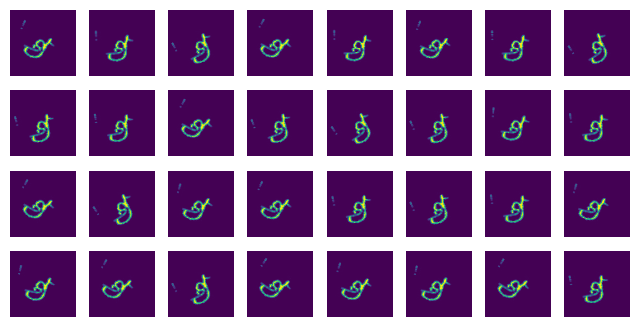

In [ ]:
plt.figure(figsize=(8, 4))
for i in range(32):
    augmented_image = data_augmentation(images)
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

# Model architecture creation

In [ ]:
def create_model():
    model= Sequential([
    Input(shape=(img_height,img_height,1)),
    resize_and_rescale,
#     data_augmentation,
    Conv2D(filters =32 , kernel_size= (7,7) ,activation = 'relu' ,padding='same' ),
    Conv2D(filters =32 , kernel_size= (7,7) ,activation = 'relu' ,padding='same' ),
#     BatchNormalization() ,
    MaxPool2D(pool_size=(8,8) ,strides=(2,2) ),

    Conv2D(filters =64 , kernel_size= (7,7) ,activation = 'relu' ,padding='same'),
    Conv2D(filters =64 , kernel_size= (7,7) ,activation = 'relu' ,padding='same'),
    MaxPool2D(pool_size=(2,2) ,strides=(2,2) ),

    Conv2D(filters =128 , kernel_size= (7,7) ,activation = 'relu' ,padding='same'),


    Flatten(),
    Dense(units=1000, activation='relu'),

    Dense(units=len(sinhala_classes), activation='softmax')

    ])
    model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modle training

In [ ]:
def model_train(model,save_name,epoch):
    history=model.fit(
    x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    epochs=epoch,
    verbose=1)

    draw_plot(history)

    model.save(save_name+'.h5')
    model.evaluate(test_batches)

In [ ]:
model =create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 80, 80, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 80, 80, 32)        1600      
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 32)        50208     
                                                                 
 max_pooling2d (MaxPooling2  (None, 37, 37, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        100416    
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 64)        200768    
                                                      

# Save and Train model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Specify the path within Google Drive
file_path = '/content/drive/My Drive/saved_models_from_colab/Sinhala_Letters/Sinhala_Handwritten_CNN_model'

Mounted at /content/drive


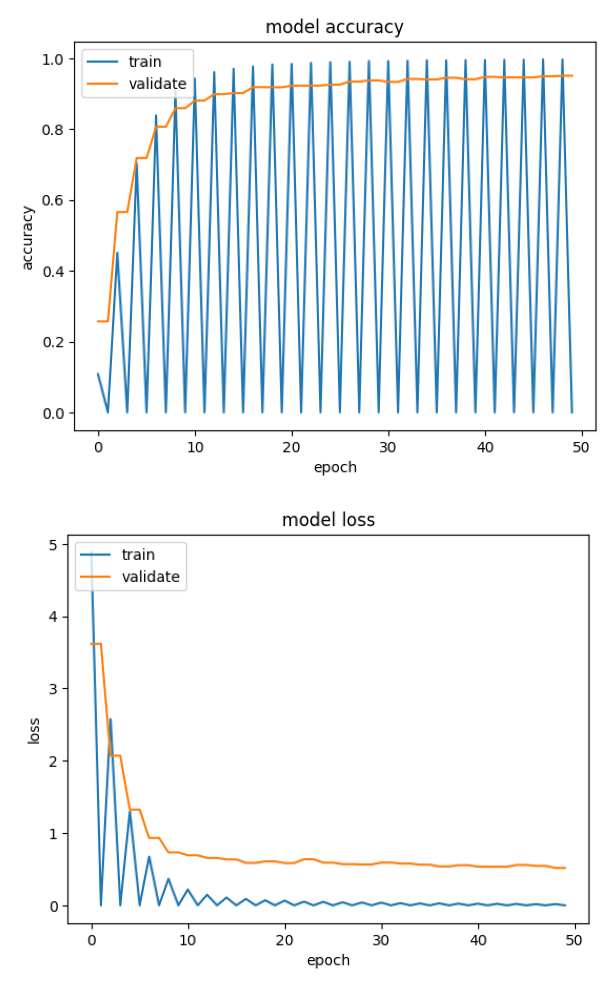

In [3]:
model_train(model,'model_test',50)
# Save the entire model as a .h5 file
model.save(file_path + '/model/sinhala_handwritten_cnn.h5')